Description: Gets the mask bounds for target and input grids for conservative regridding
    using xesmf.

Method: Uses coarsening/regrid_utils.py

In [1]:
import xarray as xr
import numpy as np

Get target grid - EXP4

Domain is for SO_JET -> see UREAD workplan

In [2]:
mask025_path = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP4/mesh_mask_025.nc'
mask025 = xr.open_dataset(mask025_path)

In [154]:
mask025_masked = mask025.where( (-47.5 < mask025.gphit) &
                               (mask025.gphit < -37.5) &
                               (2.5 < mask025.glamt) &
                               (mask025.glamt < 17.5)
                               )
mask025_masked

<xarray.Dataset>
Dimensions:       (y: 797, x: 202, time_counter: 1, nav_lev: 36)
Coordinates:
  * nav_lev       (nav_lev) float32 5.034 15.32 25.96 ... 3.757e+03 4.253e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x, time_counter) float32 nan nan nan nan ... nan nan nan
    nav_lat       (y, x, time_counter) float32 nan nan nan nan ... nan nan nan
    tmask         (time_counter, nav_lev, y, x) float32 nan nan nan ... nan nan
    umask         (time_counter, nav_lev, y, x) float32 nan nan nan ... nan nan
    vmask         (time_counter, nav_lev, y, x) float32 nan nan nan ... nan nan
    fmask         (time_counter, nav_lev, y, x) float32 nan nan nan ... nan nan
    ...            ...
    e3uw_0        (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    e3vw_0        (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    gdept_1d      (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    gdepw_1d      (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    gdept_0       (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
    gdepw_0       (time_counter, nav_lev, y, x) float64 nan nan nan ... nan nan
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  10/01/2026 15:51:12 +0000

In [155]:
mask025_subsample = mask025_masked.dropna(dim='y', how='all').dropna(dim='x', how='all')
mask025_subsample

<xarray.Dataset>
Dimensions:       (y: 54, x: 60, time_counter: 1, nav_lev: 36)
Coordinates:
  * nav_lev       (nav_lev) float32 5.034 15.32 25.96 ... 3.757e+03 4.253e+03
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x, time_counter) float32 2.625 2.875 3.125 ... 17.12 17.38
    nav_lat       (y, x, time_counter) float32 -47.42 -47.42 ... -37.69 -37.69
    tmask         (time_counter, nav_lev, y, x) float32 1.0 1.0 1.0 ... 0.0 0.0
    umask         (time_counter, nav_lev, y, x) float32 1.0 1.0 1.0 ... 0.0 0.0
    vmask         (time_counter, nav_lev, y, x) float32 1.0 1.0 1.0 ... 0.0 0.0
    fmask         (time_counter, nav_lev, y, x) float32 1.0 1.0 1.0 ... 0.0 0.0
    ...            ...
    e3uw_0        (time_counter, nav_lev, y, x) float64 10.07 10.07 ... 592.6
    e3vw_0        (time_counter, nav_lev, y, x) float64 10.07 10.07 ... 592.6
    gdept_1d      (time_counter, nav_lev, y, x) float64 5.034 ... 4.253e+03
    gdepw_1d      (time_counter, nav_lev, y, x) float64 0.0 0.0 ... 4e+03 4e+03
    gdept_0       (time_counter, nav_lev, y, x) float64 5.034 ... 4.309e+03
    gdepw_0       (time_counter, nav_lev, y, x) float64 0.0 0.0 ... 4e+03 4e+03
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  10/01/2026 15:51:12 +0000

In [6]:
mask = mask025_subsample.isel(nav_lev=0)

In [93]:
mask025_subsample.gphit.values

array([[[-47.42214099, -47.42214099, -47.42214099, ..., -47.42214099,
         -47.42214099, -47.42214099],
        [-47.25272135, -47.25272135, -47.25272135, ..., -47.25272135,
         -47.25272135, -47.25272135],
        [-47.08275797, -47.08275797, -47.08275797, ..., -47.08275797,
         -47.08275797, -47.08275797],
        ...,
        [-38.08845437, -38.08845437, -38.08845437, ..., -38.08845437,
         -38.08845437, -38.08845437],
        [-37.89142487, -37.89142487, -37.89142487, ..., -37.89142487,
         -37.89142487, -37.89142487],
        [-37.69386667, -37.69386667, -37.69386667, ..., -37.69386667,
         -37.69386667, -37.69386667]]])

In [156]:
condition = ~np.isnan(mask025_masked.gphit.isel(time_counter=0))

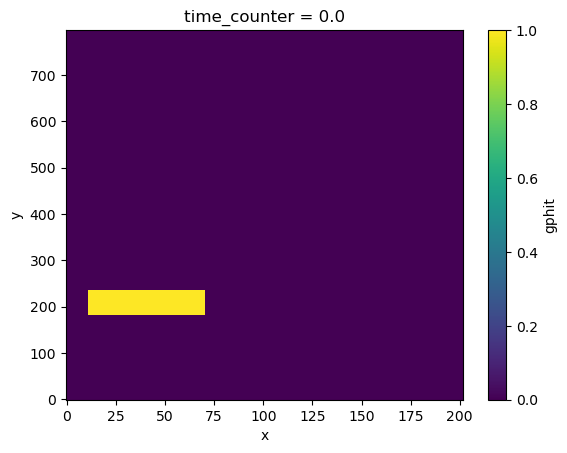

In [74]:
condition.plot()

In [157]:
subsample = np.argwhere(condition.values)

In [158]:
subsample

array([[182,  11],
       [182,  12],
       [182,  13],
       ...,
       [235,  68],
       [235,  69],
       [235,  70]])

In [159]:
jmin, imin = subsample[:,0].min(), subsample[:,1].min()
jmax, imax = subsample[:,0].max(), subsample[:,1].max()

In [160]:
jmin, jmax, imin, imax

(182, 235, 11, 70)

In [161]:
# get nav_lon bounds
masked = mask025.isel(nav_lev=0).where( 
    ( mask025.gphiu.isel(x=imin-1,y=jmin-1).values <= mask025.gphiu) & 
    ( mask025.gphiu <= mask025.gphiu.isel(x=imax,y=jmax).values ) &
    ( mask025.glamu.isel(x=imin-1,y=jmin-1).values <= mask025.glamu ) & 
    ( mask025.glamu <= mask025.glamu.isel(x=imax,y=jmax).values ) 
    )

# masked.tmask.plot()

In [162]:
nav_lon_subsample = masked.dropna(dim='y', how='all').dropna(dim='x', how='all')

In [163]:
nav_lon_subsample

<xarray.Dataset>
Dimensions:       (y: 55, x: 61, time_counter: 1)
Coordinates:
    nav_lev       float32 5.034
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x, time_counter) float32 2.375 2.625 2.875 ... 17.12 17.38
    nav_lat       (y, x, time_counter) float32 -47.59 -47.59 ... -37.69 -37.69
    tmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    umask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    vmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    fmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    ...            ...
    e3uw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    e3vw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    gdept_1d      (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_1d      (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    gdept_0       (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_0       (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  10/01/2026 15:51:12 +0000

In [87]:
nav_lon_subsample.glamu.values

array([[[ 2.5 ,  2.75,  3.  , ..., 17.  , 17.25, 17.5 ],
        [ 2.5 ,  2.75,  3.  , ..., 17.  , 17.25, 17.5 ],
        [ 2.5 ,  2.75,  3.  , ..., 17.  , 17.25, 17.5 ],
        ...,
        [ 2.5 ,  2.75,  3.  , ..., 17.  , 17.25, 17.5 ],
        [ 2.5 ,  2.75,  3.  , ..., 17.  , 17.25, 17.5 ],
        [ 2.5 ,  2.75,  3.  , ..., 17.  , 17.25, 17.5 ]]])

In [164]:
# get bounds for v grid
masked = mask025.isel(nav_lev=0).where( 
    ( mask025.gphiv.isel(x=imin-1,y=jmin-1).values <= mask025.gphiv) & 
    ( mask025.gphiv <= mask025.gphiv.isel(x=imax,y=jmax).values ) &
    ( mask025.glamv.isel(x=imin-1,y=jmin-1).values <= mask025.glamv ) & 
    ( mask025.glamv <= mask025.glamv.isel(x=imax,y=jmax).values ) 
    )

In [165]:
nav_lat_subsample = masked.dropna(dim='y', how='all').dropna(dim='x', how='all')

In [166]:
nav_lat_subsample

<xarray.Dataset>
Dimensions:       (y: 55, x: 61, time_counter: 1)
Coordinates:
    nav_lev       float32 5.034
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x, time_counter) float32 2.375 2.625 2.875 ... 17.12 17.38
    nav_lat       (y, x, time_counter) float32 -47.59 -47.59 ... -37.69 -37.69
    tmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    umask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    vmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    fmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    ...            ...
    e3uw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    e3vw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    gdept_1d      (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_1d      (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    gdept_0       (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_0       (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  10/01/2026 15:51:12 +0000

In [92]:
nav_lat_subsample.gphiv.values

array([[[-47.506647  , -47.506647  , -47.506647  , ..., -47.506647  ,
         -47.506647  , -47.506647  ],
        [-47.33749912, -47.33749912, -47.33749912, ..., -47.33749912,
         -47.33749912, -47.33749912],
        [-47.16780764, -47.16780764, -47.16780764, ..., -47.16780764,
         -47.16780764, -47.16780764],
        ...,
        [-37.99000577, -37.99000577, -37.99000577, ..., -37.99000577,
         -37.99000577, -37.99000577],
        [-37.7927118 , -37.7927118 , -37.7927118 , ..., -37.7927118 ,
         -37.7927118 , -37.7927118 ],
        [-37.59488959, -37.59488959, -37.59488959, ..., -37.59488959,
         -37.59488959, -37.59488959]]])

Now assemble the target grid

In [167]:
target_grid = {'lon': mask025_subsample.glamt.isel(time_counter=0).values,
                'lat': mask025_subsample.gphit.isel(time_counter=0).values,
                'lon_b': nav_lon_subsample.glamu.isel(time_counter=0).values,
                'lat_b': nav_lat_subsample.gphiv.isel(time_counter=0).values,
                }

In [168]:
target_grid

{'lon': array([[ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        ...,
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375]]),
 'lat': array([[-47.42214099, -47.42214099, -47.42214099, ..., -47.42214099,
         -47.42214099, -47.42214099],
        [-47.25272135, -47.25272135, -47.25272135, ..., -47.25272135,
         -47.25272135, -47.25272135],
        [-47.08275797, -47.08275797, -47.08275797, ..., -47.08275797,
         -47.08275797, -47.08275797],
        ...,
        [-38.08845437, -38.08845437, -38.08845437, ..., -38.08845437,
         -38.08845437, -38.08845437],
        [-37.89142487, -37.89142487, -37.89142487, ..., -37.89142487,
         -37.89142487, -37.89142487],
        [-37.69386667, -37.69386667, -37

In [169]:
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/'
# da = xr.DataArray(target_grid)
# ds = da.to_dataset(name='target_grid')
np.save(directory + 'SO_JET_target_grid_025.npy', target_grid)

In [170]:
array = np.load(directory + 'SO_JET_target_grid_025.npy', allow_pickle=True)
d = array.item()

In [171]:
d

{'lon': array([[ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        ...,
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375],
        [ 2.625,  2.875,  3.125, ..., 16.875, 17.125, 17.375]]),
 'lat': array([[-47.42214099, -47.42214099, -47.42214099, ..., -47.42214099,
         -47.42214099, -47.42214099],
        [-47.25272135, -47.25272135, -47.25272135, ..., -47.25272135,
         -47.25272135, -47.25272135],
        [-47.08275797, -47.08275797, -47.08275797, ..., -47.08275797,
         -47.08275797, -47.08275797],
        ...,
        [-38.08845437, -38.08845437, -38.08845437, ..., -38.08845437,
         -38.08845437, -38.08845437],
        [-37.89142487, -37.89142487, -37.89142487, ..., -37.89142487,
         -37.89142487, -37.89142487],
        [-37.69386667, -37.69386667, -37

Now, assemble input grid with bounds

Here we use the indices computed in subset_dino.ipynb for consistency

In [172]:
mask16_path = '~/Python/AI4PEX/DINO/mesh_mask_exp16.nc'
mask16 = xr.open_dataset(mask16_path)

In [177]:
jmin = 726
jamx = 942
imin = 41
imax = 279

In [181]:
# get bounds for t grid
masked = mask16.isel(nav_lev=0).where( 
    ( mask16.gphit.isel(x=imin-1,y=jmin-1).values < mask16.gphit) & 
    ( mask16.gphit < mask16.gphit.isel(x=imax,y=jmax).values ) &
    ( mask16.glamt.isel(x=imin-1,y=jmin-1).values < mask16.glamt ) & 
    ( mask16.glamt < mask16.glamt.isel(x=imax,y=jmax).values ) 
    )

In [182]:
masked_subsample = masked.dropna(dim='y', how='all').dropna(dim='x', how='all')

In [183]:
masked_subsample

<xarray.Dataset>
Dimensions:       (y: 216, x: 238, time_counter: 1)
Coordinates:
    nav_lev       float32 5.034
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x, time_counter) float32 2.531 2.594 2.656 ... 17.28 17.34
    nav_lat       (y, x, time_counter) float32 -47.46 -47.46 ... -37.59 -37.59
    tmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    umask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    vmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    fmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    ...            ...
    e3uw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    e3vw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    gdept_1d      (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_1d      (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    gdept_0       (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_0       (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  21/12/2025 08:05:25 +0000

In [218]:
masked_subsample.gphit.values

array([[[-47.46441098, -47.46441098, -47.46441098, ..., -47.46441098,
         -47.46441098, -47.46441098],
        [-47.42214099, -47.42214099, -47.42214099, ..., -47.42214099,
         -47.42214099, -47.42214099],
        [-47.37983704, -47.37983704, -47.37983704, ..., -47.37983704,
         -47.37983704, -47.37983704],
        ...,
        [-37.69386667, -37.69386667, -37.69386667, ..., -37.69386667,
         -37.69386667, -37.69386667],
        [-37.64439462, -37.64439462, -37.64439462, ..., -37.64439462,
         -37.64439462, -37.64439462],
        [-37.59488959, -37.59488959, -37.59488959, ..., -37.59488959,
         -37.59488959, -37.59488959]]])

In [176]:
condition = ~np.isnan(masked.gphit.isel(time_counter=0))
subsample = np.argwhere(condition.values)

jmin, imin = subsample[:,0].min(), subsample[:,1].min()
jmax, imax = subsample[:,0].max(), subsample[:,1].max()

jmin, jmax, imin, imax

(726, 942, 41, 280)

In [208]:
# get bounds for u grid
masked = mask16.isel(nav_lev=0).where( 
    ( mask16.gphiu.isel(x=imin-2,y=jmin-2).values < mask16.gphiu) & 
    ( mask16.gphiu < mask16.gphiu.isel(x=imax,y=jmax).values ) &
    ( mask16.glamu.isel(x=imin-2,y=jmin-2).values < mask16.glamu ) & 
    ( mask16.glamu < mask16.glamu.isel(x=imax,y=jmax).values ) 
    )

In [209]:
nav_lon_subsample = masked.dropna(dim='y', how='all').dropna(dim='x', how='all')

In [210]:
nav_lon_subsample

<xarray.Dataset>
Dimensions:       (y: 217, x: 239, time_counter: 1)
Coordinates:
    nav_lev       float32 5.034
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x, time_counter) float32 2.469 2.531 2.594 ... 17.28 17.34
    nav_lat       (y, x, time_counter) float32 -47.51 -47.51 ... -37.59 -37.59
    tmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    umask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    vmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    fmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    ...            ...
    e3uw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    e3vw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    gdept_1d      (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_1d      (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    gdept_0       (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_0       (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  21/12/2025 08:05:25 +0000

In [211]:
nav_lon_subsample.glamu.values

array([[[ 2.5   ,  2.5625,  2.625 , ..., 17.25  , 17.3125, 17.375 ],
        [ 2.5   ,  2.5625,  2.625 , ..., 17.25  , 17.3125, 17.375 ],
        [ 2.5   ,  2.5625,  2.625 , ..., 17.25  , 17.3125, 17.375 ],
        ...,
        [ 2.5   ,  2.5625,  2.625 , ..., 17.25  , 17.3125, 17.375 ],
        [ 2.5   ,  2.5625,  2.625 , ..., 17.25  , 17.3125, 17.375 ],
        [ 2.5   ,  2.5625,  2.625 , ..., 17.25  , 17.3125, 17.375 ]]])

In [213]:
# get bounds for v grid
masked = mask16.isel(nav_lev=0).where( 
    ( mask16.gphiv.isel(x=imin-2,y=jmin-2).values < mask16.gphiv) & 
    ( mask16.gphiv < mask16.gphiv.isel(x=imax,y=jmax).values ) &
    ( mask16.glamv.isel(x=imin-2,y=jmin-2).values < mask16.glamv ) & 
    ( mask16.glamv < mask16.glamv.isel(x=imax,y=jmax).values ) 
    )

In [214]:
nav_lat_subsample = masked.dropna(dim='y', how='all').dropna(dim='x', how='all')

In [216]:
nav_lat_subsample

<xarray.Dataset>
Dimensions:       (y: 217, x: 239, time_counter: 1)
Coordinates:
    nav_lev       float32 5.034
  * time_counter  (time_counter) float32 0.0
Dimensions without coordinates: y, x
Data variables: (12/42)
    nav_lon       (y, x, time_counter) float32 2.469 2.531 2.594 ... 17.28 17.34
    nav_lat       (y, x, time_counter) float32 -47.51 -47.51 ... -37.59 -37.59
    tmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    umask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    vmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    fmask         (time_counter, y, x) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    ...            ...
    e3uw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    e3vw_0        (time_counter, y, x) float64 10.07 10.07 10.07 ... 10.07 10.07
    gdept_1d      (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_1d      (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    gdept_0       (time_counter, y, x) float64 5.034 5.034 5.034 ... 5.034 5.034
    gdepw_0       (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    CfgName:    DINO
    CfgIndex:   0
    Iperio:     1
    Jperio:     0
    NFold:      0
    NFtype:     -
    VertCoord:  zco
    IsfCav:     0
    file_name:  mesh_mask.nc
    TimeStamp:  21/12/2025 08:05:25 +0000

In [215]:
nav_lat_subsample.gphiv.values

array([[[-47.48553323, -47.48553323, -47.48553323, ..., -47.48553323,
         -47.48553323, -47.48553323],
        [-47.44328023, -47.44328023, -47.44328023, ..., -47.44328023,
         -47.44328023, -47.44328023],
        [-47.40099326, -47.40099326, -47.40099326, ..., -47.40099326,
         -47.40099326, -47.40099326],
        ...,
        [-37.66913476, -37.66913476, -37.66913476, ..., -37.66913476,
         -37.66913476, -37.66913476],
        [-37.61964622, -37.61964622, -37.61964622, ..., -37.61964622,
         -37.61964622, -37.61964622],
        [-37.57012472, -37.57012472, -37.57012472, ..., -37.57012472,
         -37.57012472, -37.57012472]]])

In [219]:
# now make input grid array
input_grid = {'lon': masked_subsample.glamt.isel(time_counter=0).values,
              'lat': masked_subsample.gphit.isel(time_counter=0).values,
              'lon_b': nav_lon_subsample.glamu.isel(time_counter=0).values,
              'lat_b': nav_lat_subsample.gphiv.isel(time_counter=0).values,
              }

In [220]:
input_grid

{'lon': array([[ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        ...,
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375],
        [ 2.53125,  2.59375,  2.65625, ..., 17.21875, 17.28125, 17.34375]]),
 'lat': array([[-47.46441098, -47.46441098, -47.46441098, ..., -47.46441098,
         -47.46441098, -47.46441098],
        [-47.42214099, -47.42214099, -47.42214099, ..., -47.42214099,
         -47.42214099, -47.42214099],
        [-47.37983704, -47.37983704, -47.37983704, ..., -47.37983704,
         -47.37983704, -47.37983704],
        ...,
        [-37.69386667, -37.69386667, -37.69386667, ..., -37.69386667,
         -37.69386667, -37.69386667],
        [-37.64439462, -37.64439462, -37.64439462, ..., -37.64439462,
      

In [221]:
# save to file
directory = '/gws/nopw/j04/ai4pex/twilder/NEMO_data/DINO/EXP16/features/SO_JET/'
np.save(directory + 'SO_JET_input_grid_16.npy', input_grid)

In [152]:
array = np.load(directory + 'SO_JET_input_grid_16.npy', allow_pickle=True)
input_grid = array.item()

In [153]:
input_grid

{'lon': array([[ 2.53125,  2.59375,  2.65625, ..., 17.34375, 17.40625, 17.46875],
        [ 2.53125,  2.59375,  2.65625, ..., 17.34375, 17.40625, 17.46875],
        [ 2.53125,  2.59375,  2.65625, ..., 17.34375, 17.40625, 17.46875],
        ...,
        [ 2.53125,  2.59375,  2.65625, ..., 17.34375, 17.40625, 17.46875],
        [ 2.53125,  2.59375,  2.65625, ..., 17.34375, 17.40625, 17.46875],
        [ 2.53125,  2.59375,  2.65625, ..., 17.34375, 17.40625, 17.46875]]),
 'lat': array([[-47.46441098, -47.46441098, -47.46441098, ..., -47.46441098,
         -47.46441098, -47.46441098],
        [-47.42214099, -47.42214099, -47.42214099, ..., -47.42214099,
         -47.42214099, -47.42214099],
        [-47.37983704, -47.37983704, -47.37983704, ..., -47.37983704,
         -47.37983704, -47.37983704],
        ...,
        [-37.64439462, -37.64439462, -37.64439462, ..., -37.64439462,
         -37.64439462, -37.64439462],
        [-37.59488959, -37.59488959, -37.59488959, ..., -37.59488959,
      